# A machine learning model that predicts whether a customer will subscribe to a bank time deposit using the Bank Marketing Data Set. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OrdinalEncoder
import pickle #pickle for saving the model.
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,  StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, make_scorer, roc_auc_score
from sklearn.feature_selection import SelectFromModel

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [6]:
# DATASET LOADING
data = pd.read_csv('bank-additional.csv', sep=';')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# Number of unique values.
data.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

## DATA VISUALIZATION

<Axes: xlabel='y', ylabel='count'>

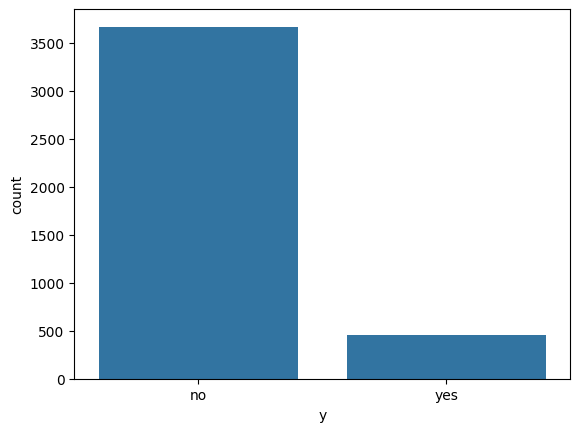

In [9]:
sns.countplot(x = data['y'])

<Axes: xlabel='age', ylabel='Density'>

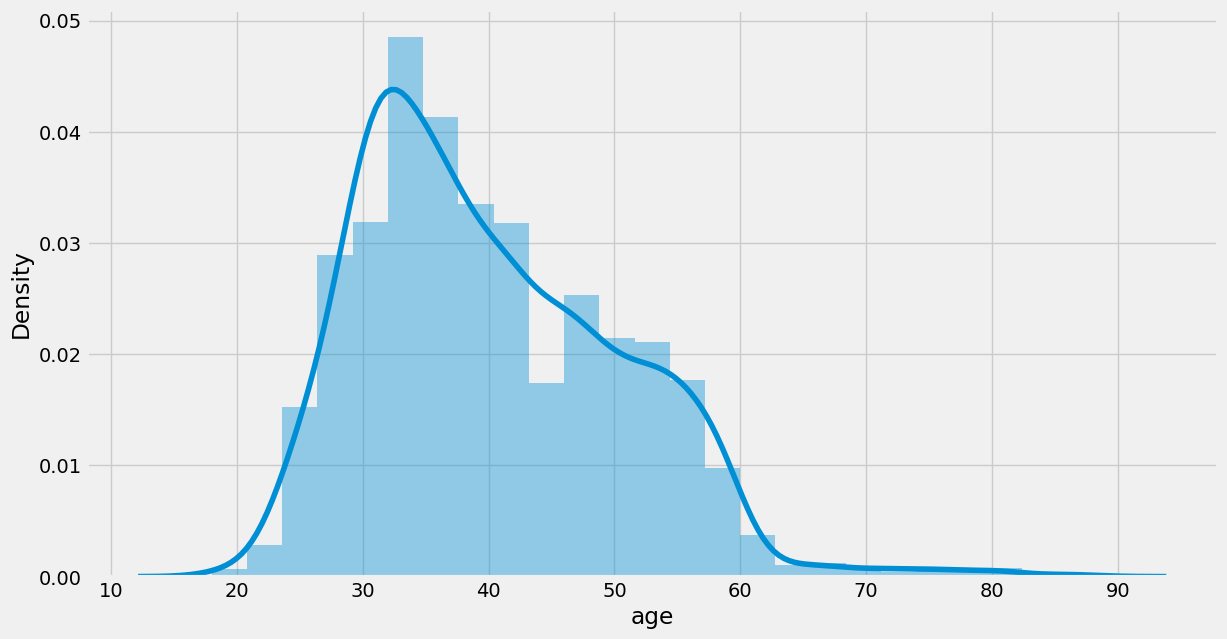

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(data['age'], bins=25)

[Text(0, 0, 'basic.9y'),
 Text(1, 0, 'high.school'),
 Text(2, 0, 'university.degree'),
 Text(3, 0, 'professional.course'),
 Text(4, 0, 'basic.6y'),
 Text(5, 0, 'basic.4y'),
 Text(6, 0, 'unknown'),
 Text(7, 0, 'illiterate')]

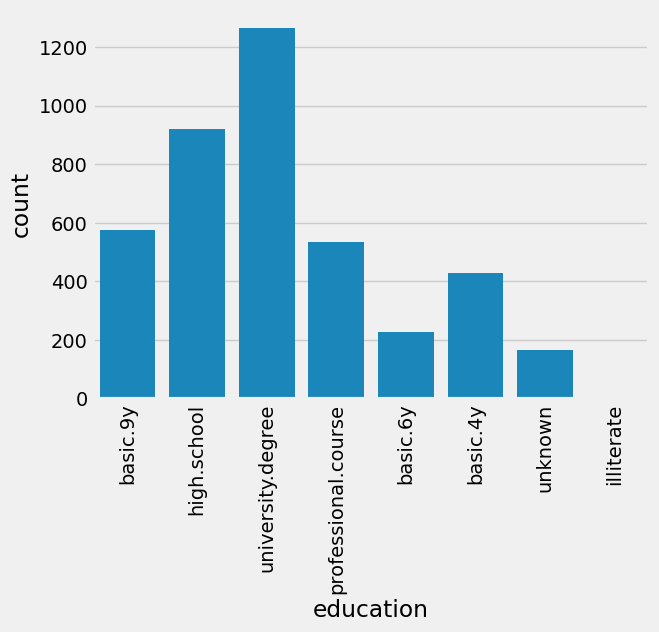

In [11]:
ax = sns.countplot(x = data['education'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [12]:
illiterate_count = len(data[data['education'] == 'illiterate'])
print(f"Number of illiterate people: {illiterate_count}")

Number of illiterate people: 1


[Text(0, 0, 'blue-collar'),
 Text(1, 0, 'services'),
 Text(2, 0, 'admin.'),
 Text(3, 0, 'entrepreneur'),
 Text(4, 0, 'self-employed'),
 Text(5, 0, 'technician'),
 Text(6, 0, 'management'),
 Text(7, 0, 'student'),
 Text(8, 0, 'retired'),
 Text(9, 0, 'housemaid'),
 Text(10, 0, 'unemployed'),
 Text(11, 0, 'unknown')]

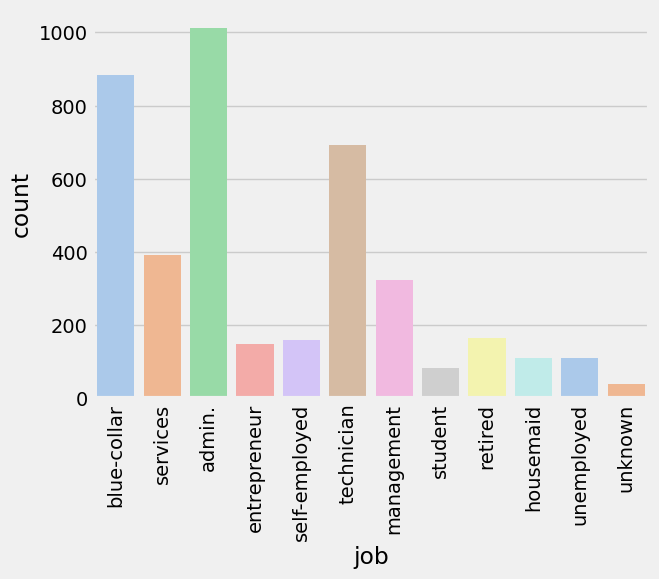

In [13]:
ax = sns.countplot(x = data['job'], palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<Axes: xlabel='marital', ylabel='count'>

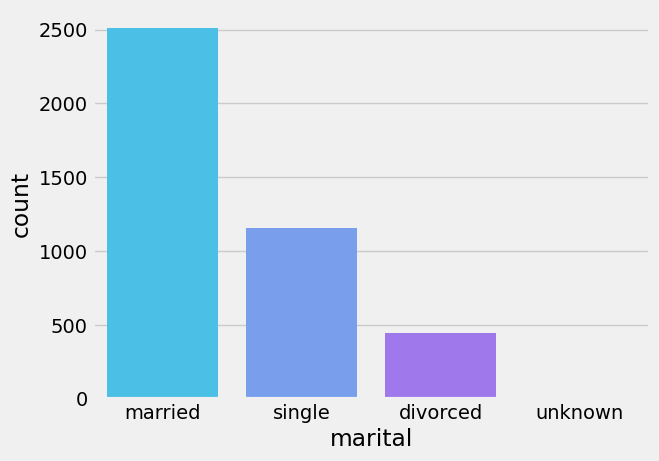

In [14]:
sns.countplot(x = data['marital'], palette='cool')

<Axes: xlabel='month', ylabel='count'>

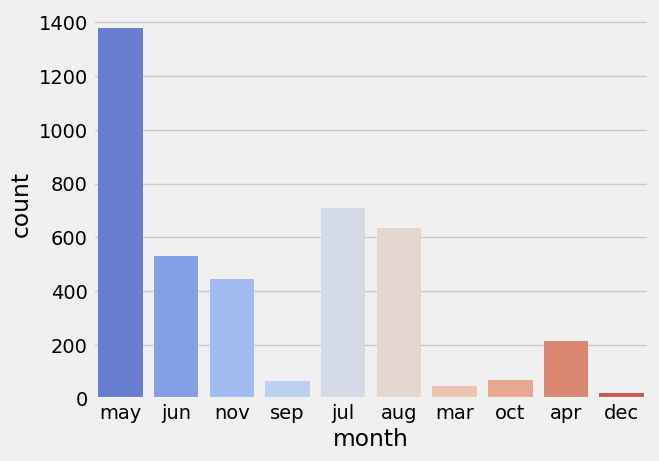

In [15]:
sns.countplot(x = data['month'], palette='coolwarm')

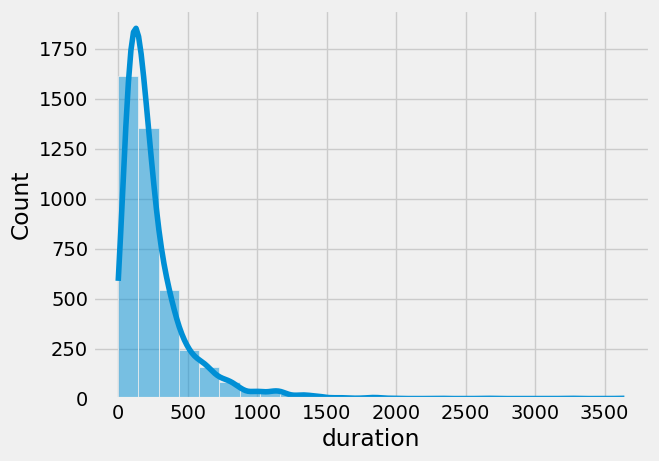

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['duration'], bins=25, kde=True)  # kde=True, inserts scatter line 
plt.show()

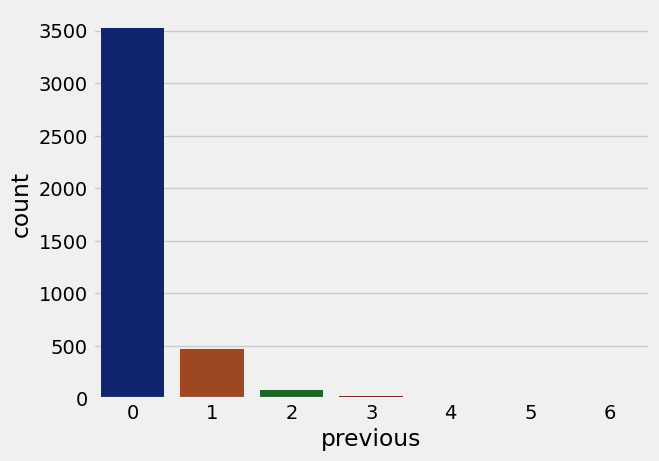

In [17]:
ax = sns.countplot(x = data['previous'], palette='dark')

In [18]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


<Axes: xlabel='emp.var.rate', ylabel='count'>

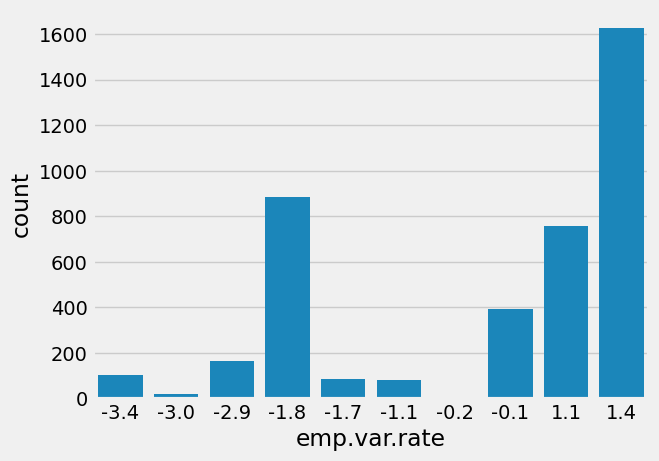

In [19]:
sns.countplot(x = data['emp.var.rate'])

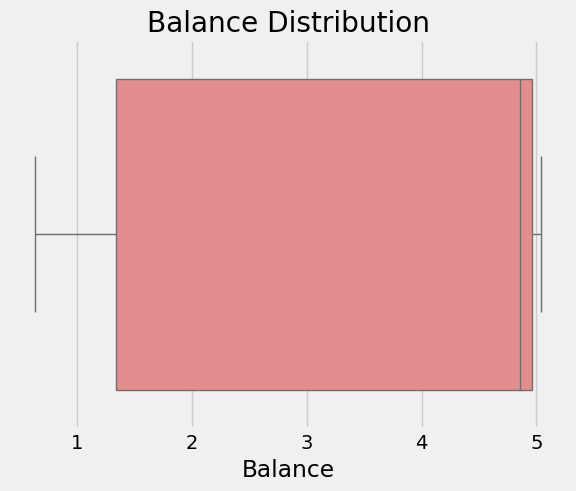

In [20]:
sns.boxplot(data=data, x='euribor3m', color='lightcoral')
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.show()

[Text(0, 0, '4963.6'),
 Text(1, 0, '4991.6'),
 Text(2, 0, '5008.7'),
 Text(3, 0, '5017.5'),
 Text(4, 0, '5023.5'),
 Text(5, 0, '5076.2'),
 Text(6, 0, '5099.1'),
 Text(7, 0, '5176.3'),
 Text(8, 0, '5191.0'),
 Text(9, 0, '5195.8'),
 Text(10, 0, '5228.1')]

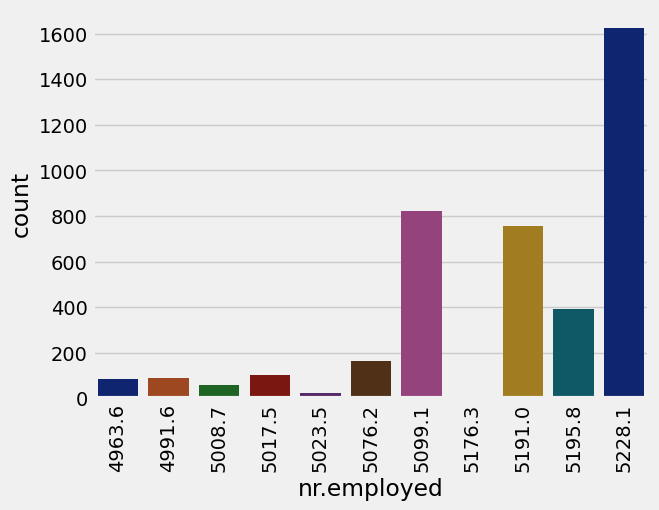

In [21]:
ax = sns.countplot(x = data['nr.employed'],palette='dark')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## DATA CLEANING

In [22]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [23]:
data.drop(columns=['pdays', 'previous', 'default'], inplace=True)
print("Güncellenmiş sütunlar:", data.columns)

Güncellenmiş sütunlar: Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   housing         4119 non-null   object 
 5   loan            4119 non-null   object 
 6   contact         4119 non-null   object 
 7   month           4119 non-null   object 
 8   day_of_week     4119 non-null   object 
 9   duration        4119 non-null   int64  
 10  campaign        4119 non-null   int64  
 11  poutcome        4119 non-null   object 
 12  emp.var.rate    4119 non-null   float64
 13  cons.price.idx  4119 non-null   float64
 14  cons.conf.idx   4119 non-null   float64
 15  euribor3m       4119 non-null   float64
 16  nr.employed     4119 non-null   float64
 17  y               4119 non-null   o

## DATA PREPROCESSING

In [25]:
# Setting the attribute y as the target variable
X = data.drop(columns=['y'])
y = data['y']

In [26]:
# Divide dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Fill missing values in numeric columns only
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

x_train[numeric_cols] = x_train[numeric_cols].fillna(x_train[numeric_cols].mean())
x_test[numeric_cols] = x_test[numeric_cols].fillna(x_test[numeric_cols].mean())


In [28]:
# Control the number of NaNs in columns:
print("x_train NaN kontrol:")
print(x_train.isnull().sum())

print("\nx_test NaN kontrol:")
print(x_test.isnull().sum())


x_train NaN kontrol:
age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

x_test NaN kontrol:
age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


In [29]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = num_imputer.fit_transform(data[num_cols])

In [30]:
data['education'] = data['education'].replace({
    'basic.4y': 'basic',
    'basic.6y': 'basic',
    'basic.9y': 'basic'
})

In [31]:
under_18 = data[data['age'] < 18]  

# Finding the number of these people.(For outlier values)
count_under_18 = under_18.shape[0]

print(f"Yaşı 18'den küçük kişi sayısı: {count_under_18}")

Yaşı 18'den küçük kişi sayısı: 0


In [32]:
# Specifying "month" and "day_of_week" categories to perform ordinal encoding in sequential order
month_categories = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
day_categories = ["mon","tue","wed","thu","fri","sat","sun"]

In [33]:
# Listing categorical columns to perform one_hot_encoding on them
categorical_columns = ["job","marital","housing","loan","contact","education"]

In [34]:
# Listing numerical columns to perform scaling on them
# numerical_columns = ['age', "duration",'campaign','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

numerical_columns = ['age', "duration",'campaign','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [35]:
# Defining preprocess steps, they will be performed on dataset with pipeline

preprocess = ColumnTransformer([
                             ("month_encoded",OrdinalEncoder(categories=[month_categories]),['month']),
                             ("day_encoded",OrdinalEncoder(categories=[day_categories]),['day_of_week']),
                             ('one_hot_encoder',OneHotEncoder(handle_unknown='ignore'), categorical_columns[1:]),
                             ("numeric_scaler", StandardScaler(), numerical_columns),
                             ('minmaxscaling', MinMaxScaler(), numerical_columns),
                            ])

## FEATURE ENGINEERING

In [36]:
# Feature scaling
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [37]:
# Create interaction features
# campaign (number of calls to a customer) multiplied by duration (duration of each call) to calculate the total campaign duration.
# Benefit: Longer campaigns and more contact time can potentially impact success.

data['campaign'] = pd.to_numeric(data['campaign'], errors='coerce')
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')
data['euribor3m'] = pd.to_numeric(data['euribor3m'], errors='coerce')
data['nr.employed'] = pd.to_numeric(data['nr.employed'], errors='coerce')


data['campaign_duration'] = data['campaign'] * data['duration']
data['economic_ratio'] = data['euribor3m'] / data['nr.employed']

In [38]:
# Print the engineered features
print("Sample of Engineered Features:")
print(data[['campaign_duration', 'economic_ratio']].head())

Sample of Engineered Features:
   campaign_duration  economic_ratio
0          -0.189132        1.455769
1           0.199543        2.138115
2           0.070023        0.924561
3          -0.169671        0.922492
4           0.467291        0.825651


## INPUT SPLIT

In [39]:
# Setting the attribute y as the target variable
X = data.drop(columns=['y'])
y = data['y']

In [40]:
# Divide dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## MODEL TRAINING

In [41]:
def makePipeline(preprocess, model):
    feature_selection = SelectFromModel(model)
    pipeline = make_pipeline(preprocess,feature_selection, model)
    return pipeline

In [42]:
def trainmodel_calculateAccuracy(preprocess, model, x_train, y_train, x_test, y_test): #To find the best model among 3 models.
    pipeline = makePipeline(preprocess, model)
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict (x_test)
    return accuracy_score(y_test, predictions), predictions

In [43]:
def findbestmodel(preprocess, models, x_train, y_train, x_test, y_test): #Now find the best model.
    model_and_accuracy = {}
    i = 0
    for m in models:
        model = m
        accuracy_i, pre= trainmodel_calculateAccuracy(preprocess, model,x_train, y_train, x_test, y_test)
        model_and_accuracy[model] = accuracy_i
        i+=1
       
    keys = list(model_and_accuracy.keys())
    values = list(model_and_accuracy.values())
    accuracy = 0
    best_model = 0
    index = 0

    for v in values:
        if v > accuracy:
            accuracy = v
            best_model = index
        index+=1
    
    print(keys[best_model])
    print(accuracy) 
    
    return keys[best_model]


## MODEL SELECTION

In [44]:
# Fill missing values in numeric columns only
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

x_train[numeric_cols] = x_train[numeric_cols].fillna(x_train[numeric_cols].mean())
x_test[numeric_cols] = x_test[numeric_cols].fillna(x_test[numeric_cols].mean())

In [45]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

# Find the best model
best_model = findbestmodel(preprocess, models, x_train, y_train, x_test, y_test)

LogisticRegression()
0.8996763754045307


In [46]:
print("Best model:", best_model)


Best model: LogisticRegression()


## HYPERPARAMETER TUNING

In [47]:
def findHyperparameters(model):  
    cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    pipeline = makePipeline(preprocess, model)

    # Pipeline'daki modelin adını bul
    print("Pipeline parametreleri:", pipeline.get_params().keys())
    
    # Parametre ızgarasını model türüne göre ayarlayın
    if isinstance(model, LogisticRegression):
        param_grid = {
            'logisticregression__penalty': ['l1', 'l2'],
            'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'logisticregression__solver': ['liblinear', 'saga']
        }
    elif isinstance(model, RandomForestClassifier):
        param_grid = {
            'randomforestclassifier__n_estimators': [100, 200, 300],
            'randomforestclassifier__max_depth': [None, 10, 20, 30],
            'randomforestclassifier__min_samples_split': [2, 5, 10]
        }
    elif isinstance(model, DecisionTreeClassifier):
        param_grid = {
            'decisiontreeclassifier__max_depth': [10, 20, 30, 40],
            'decisiontreeclassifier__min_samples_split': [2, 5, 10],
            'decisiontreeclassifier__criterion': ['gini', 'entropy']
        }

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy')
    results_of_crossValidation = cross_validate(pipeline, x_train, y_train, cv=cv, return_train_score=True)
    average_crossValidation_score = np.mean(results_of_crossValidation['test_score'])
    print("CV score: ", average_crossValidation_score)
    grid_search.fit(x_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    accuracy = best_model.score(x_test, y_test)

    print("Best Hyperparameters:", best_params)
    print("Best Accuracy:", accuracy)

    return best_model, accuracy


In [48]:
tuned_best_model, tuned_accuracy = findHyperparameters(best_model)

Pipeline parametreleri: dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'selectfrommodel', 'logisticregression', 'columntransformer__force_int_remainder_cols', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__month_encoded', 'columntransformer__day_encoded', 'columntransformer__one_hot_encoder', 'columntransformer__numeric_scaler', 'columntransformer__minmaxscaling', 'columntransformer__month_encoded__categories', 'columntransformer__month_encoded__dtype', 'columntransformer__month_encoded__encoded_missing_value', 'columntransformer__month_encoded__handle_unknown', 'columntransformer__month_encoded__max_categories', 'columntransformer__month_encoded__min_frequency', 'columntransformer__month_encoded__unknown_value', 'columntransformer__day_encoded__c

## EVALUATION

In [49]:
pipeline = makePipeline(preprocess, best_model)
#accuracy, predictions = trainmodel_calculateAccuracy(preprocess, best_model, x_train, y_train, x_test, y_test)
predictions = tuned_best_model.predict(x_test)
precision = precision_score(y_test, predictions, pos_label='yes')
recall = recall_score(y_test, predictions, pos_label='yes')
f1 = f1_score(y_test, predictions, pos_label='yes')
cm = confusion_matrix(y_test, predictions)

In [50]:
print("Accuracy: ", tuned_accuracy)
print("Precision: ", precision)
print("Recall: ", recall) 
print("F1 Score: ", f1)
print("Confusion Matrix: ")
print(cm)

Accuracy:  0.9029126213592233
Precision:  0.5591397849462365
Recall:  0.3969465648854962
F1 Score:  0.4642857142857143
Confusion Matrix: 
[[1064   41]
 [  79   52]]


## STREAMLIT

In [51]:
pickle.dump(tuned_best_model, open('tuned_best_model.pkl', 'wb'))